In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/EV-Project/data/ev_charging_data.csv')
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249,Morning,Morning_sunny,1
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351,Afternoon,Afternoon_sunny,1
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361,Morning,Morning_sunny,1
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826,Afternoon,Afternoon_sunny,1
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875,Afternoon,Afternoon_sunny,1


In [3]:
numeric_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_cols].corr()
print("Correlation with total_kwh:\n")
print(correlation_matrix['total_kwh'].sort_values(ascending=False))

Correlation with total_kwh:

total_kwh                    1.000000
charging_duration_minutes    0.909018
charging_rate                0.398412
longitude                    0.162746
latitude                     0.044428
start_hour                   0.020409
is_weekend                   0.009241
temperature_on_day          -0.043533
Name: total_kwh, dtype: float64


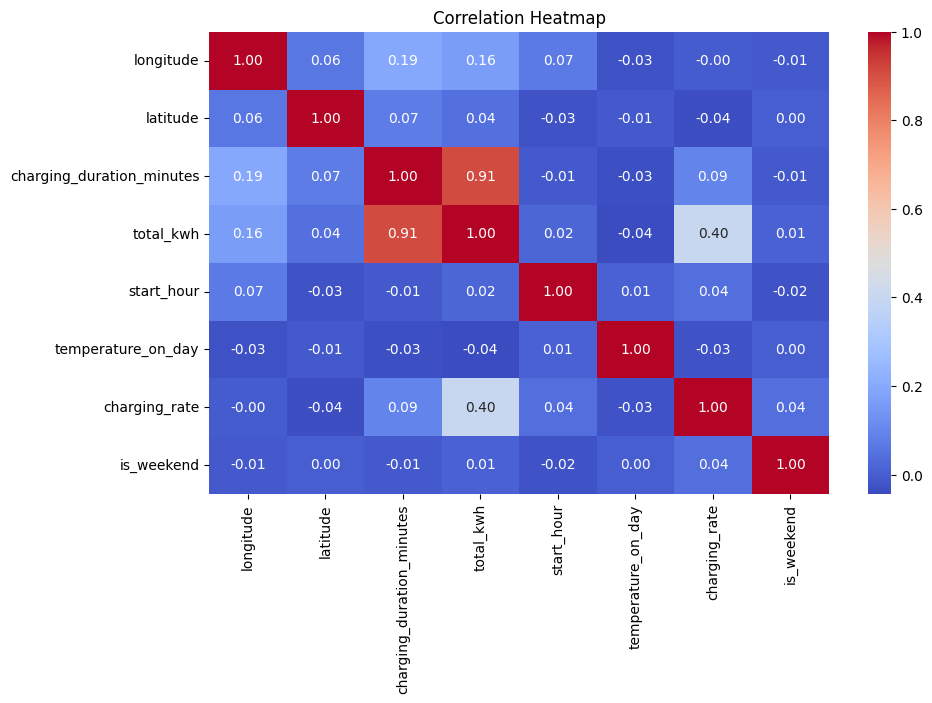

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = df[numeric_cols].drop(columns=['total_kwh'])

# Add constant term for intercept
X = add_constant(features)

ev_vif_data = pd.DataFrame()
ev_vif_data["feature"] = X.columns
ev_vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(ev_vif_data.sort_values(by="VIF", ascending=False))


Variance Inflation Factors (VIF):
                     feature           VIF
0                      const  3.071785e+06
3  charging_duration_minutes  1.054760e+00
1                  longitude  1.048002e+00
6              charging_rate  1.015414e+00
2                   latitude  1.010454e+00
4                 start_hour  1.008574e+00
7                 is_weekend  1.002483e+00
5         temperature_on_day  1.002351e+00


In [6]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249,Morning,Morning_sunny,1
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351,Afternoon,Afternoon_sunny,1
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361,Morning,Morning_sunny,1
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826,Afternoon,Afternoon_sunny,1
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875,Afternoon,Afternoon_sunny,1


Existing Features: start_hour, weekday, weather_on_day, temperature_on_day, station_id, hour_category, is_weekend, hour_weather_combo


New Features: session_count, station_type, lag_1_day_kwh, rolling_3_day_avg_kwh, temperature_bin, weekday_encoded, hour_sin, hour_cos



(If you don’t have past kWh values, ignore lag features for now — but you should add them later if you want to try time series style forecasting.)

In [7]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249,Morning,Morning_sunny,1
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351,Afternoon,Afternoon_sunny,1
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361,Morning,Morning_sunny,1
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826,Afternoon,Afternoon_sunny,1
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875,Afternoon,Afternoon_sunny,1


In [8]:
def temp_bin(temp):
    if temp < 5:
        return 'Cold'
    elif temp < 20:
        return 'Moderate'
    else:
        return 'Hot'

df['temperature_bin'] = df['temperature_on_day'].apply(temp_bin)

In [9]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend,temperature_bin
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249,Morning,Morning_sunny,1,Moderate
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351,Afternoon,Afternoon_sunny,1,Moderate
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361,Morning,Morning_sunny,1,Moderate
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826,Afternoon,Afternoon_sunny,1,Moderate
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875,Afternoon,Afternoon_sunny,1,Moderate


In [10]:
df['date_of_connection_started'] = pd.to_datetime(df['date_of_connection_started'])
df = df.sort_values(['station_id', 'date_of_connection_started'])
df.set_index(['station_id', 'date_of_connection_started'], inplace=True)
df['lag_2_day_kwh'] = df.groupby(level=0)['total_kwh'].shift(2).round(2)
df.reset_index(inplace=True)


df['date_of_connection_started'] = pd.to_datetime(df['date_of_connection_started'])
df = df.sort_values(['station_id', 'date_of_connection_started'])
df.set_index(['station_id', 'date_of_connection_started'], inplace=True)
df['lag_1_day_kwh'] = df.groupby(level=0)['total_kwh'].shift(1).round(2)
df.reset_index(inplace=True)

In [11]:
df.head()

,station_id,date_of_connection_started,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend,temperature_bin,lag_2_day_kwh,lag_1_day_kwh
0,AAA-14497,2022-12-21,-75.71,45.41,3d36371a-7e21-4af1-b1e5-13a6d9d25f1c,2022-12-21 10:32:36,2022-12-21 10:41:04,8.47,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,0.61641,False,10,Wednesday,snowy,-6.1,0.072776,Morning,Morning_snowy,0,Cold,NaN,NaN
1,AAA-14497,2023-01-05,-75.71,45.41,443d38e2-9d44-4101-849a-59eaa46b510d,2023-01-05 16:41:10,2023-01-05 17:15:23,34.22,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.83534,False,16,Thursday,snowy,-1.7,0.112079,Afternoon,Afternoon_snowy,0,Cold,NaN,0.62
2,AAA-14497,2023-02-22,-75.71,45.41,77f41ce4-dc20-4cb5-8365-fc2cae00f420,2023-02-22 10:00:15,2023-02-22 10:27:49,27.57,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.07169,False,10,Wednesday,snowy,-10.3,0.111414,Morning,Morning_snowy,0,Cold,0.62,3.84
3,AAA-14497,2023-03-02,-75.71,45.41,214046ed-07ce-40c9-93cf-848871734db4,2023-03-02 18:42:09,2023-03-02 20:13:20,91.18,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,9.93716,False,18,Thursday,snowy,-2.1,0.108984,Evening,Evening_snowy,0,Cold,3.84,3.07
4,AAA-14497,2023-03-11,-75.71,45.41,b424f1bc-0347-4266-aa22-8b21d0489eae,2023-03-11 11:29:32,2023-03-11 15:16:00,226.47,ON,City of Ottawa,170 primrose ave.,charging ended by vehicle,20.02007,False,11,Saturday,snowy,-1.4,0.088401,Morning,Morning_snowy,1,Cold,3.07,9.94


In [12]:
missing_count = df['lag_2_day_kwh'].isna().sum()
print(f"Number of missing values in lag_2_day_kwh column: {missing_count}")

missing_count = df['lag_1_day_kwh'].isna().sum()
print(f"Number of missing values in lag_1_day_kwh column: {missing_count}")

Number of missing values in lag_2_day_kwh column: 72
Number of missing values in lag_1_day_kwh column: 36


In [13]:
df['lag_2_day_kwh'] = df['lag_2_day_kwh'].fillna(df['lag_2_day_kwh'].median())

df['lag_1_day_kwh'] = df['lag_1_day_kwh'].fillna(df['lag_1_day_kwh'].median())

df.head()

,station_id,date_of_connection_started,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend,temperature_bin,lag_2_day_kwh,lag_1_day_kwh
0,AAA-14497,2022-12-21,-75.71,45.41,3d36371a-7e21-4af1-b1e5-13a6d9d25f1c,2022-12-21 10:32:36,2022-12-21 10:41:04,8.47,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,0.61641,False,10,Wednesday,snowy,-6.1,0.072776,Morning,Morning_snowy,0,Cold,10.795,10.80
1,AAA-14497,2023-01-05,-75.71,45.41,443d38e2-9d44-4101-849a-59eaa46b510d,2023-01-05 16:41:10,2023-01-05 17:15:23,34.22,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.83534,False,16,Thursday,snowy,-1.7,0.112079,Afternoon,Afternoon_snowy,0,Cold,10.795,0.62
2,AAA-14497,2023-02-22,-75.71,45.41,77f41ce4-dc20-4cb5-8365-fc2cae00f420,2023-02-22 10:00:15,2023-02-22 10:27:49,27.57,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.07169,False,10,Wednesday,snowy,-10.3,0.111414,Morning,Morning_snowy,0,Cold,0.620,3.84
3,AAA-14497,2023-03-02,-75.71,45.41,214046ed-07ce-40c9-93cf-848871734db4,2023-03-02 18:42:09,2023-03-02 20:13:20,91.18,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,9.93716,False,18,Thursday,snowy,-2.1,0.108984,Evening,Evening_snowy,0,Cold,3.840,3.07
4,AAA-14497,2023-03-11,-75.71,45.41,b424f1bc-0347-4266-aa22-8b21d0489eae,2023-03-11 11:29:32,2023-03-11 15:16:00,226.47,ON,City of Ottawa,170 primrose ave.,charging ended by vehicle,20.02007,False,11,Saturday,snowy,-1.4,0.088401,Morning,Morning_snowy,1,Cold,3.070,9.94


Goal - Predict the total energy consumption (in kWh) for each charging station for the next day (or future days). This prediction can help optimize grid load, station scheduling, and resource allocation by anticipating daily electricity demand across locations.

In [14]:
df['date_of_connection_started'] = pd.to_datetime(df['date_of_connection_started'])


daily_agg = (
    df.groupby(['station_id', 'date_of_connection_started'])
      .agg(
          avg_charging_duration=('charging_duration_minutes', 'mean'),
          avg_charging_rate=('charging_rate', 'mean')
      )
      .reset_index()
)


daily_agg.sort_values(['station_id', 'date_of_connection_started'], inplace=True)
daily_agg['rolling_3day_avg_duration'] = (
    daily_agg.groupby('station_id')['avg_charging_duration']
    .transform(lambda x: x.shift(1).rolling(3).mean().round(3))
)
daily_agg['rolling_3day_avg_rate'] = (
    daily_agg.groupby('station_id')['avg_charging_rate']
    .transform(lambda x: x.shift(1).rolling(3).mean().round(3))
)


df.drop(columns=[
    'rolling_3day_avg_duration', 
    'rolling_3day_avg_rate'
], errors='ignore', inplace=True)


df = df.merge(
    daily_agg[['station_id', 'date_of_connection_started', 
               'rolling_3day_avg_duration', 'rolling_3day_avg_rate']],
    on=['station_id', 'date_of_connection_started'],
    how='left'
)


In [15]:
df.head()

,station_id,date_of_connection_started,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend,temperature_bin,lag_2_day_kwh,lag_1_day_kwh,rolling_3day_avg_duration,rolling_3day_avg_rate
0,AAA-14497,2022-12-21,-75.71,45.41,3d36371a-7e21-4af1-b1e5-13a6d9d25f1c,2022-12-21 10:32:36,2022-12-21 10:41:04,8.47,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,0.61641,False,10,Wednesday,snowy,-6.1,0.072776,Morning,Morning_snowy,0,Cold,10.795,10.80,NaN,NaN
1,AAA-14497,2023-01-05,-75.71,45.41,443d38e2-9d44-4101-849a-59eaa46b510d,2023-01-05 16:41:10,2023-01-05 17:15:23,34.22,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.83534,False,16,Thursday,snowy,-1.7,0.112079,Afternoon,Afternoon_snowy,0,Cold,10.795,0.62,NaN,NaN
2,AAA-14497,2023-02-22,-75.71,45.41,77f41ce4-dc20-4cb5-8365-fc2cae00f420,2023-02-22 10:00:15,2023-02-22 10:27:49,27.57,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.07169,False,10,Wednesday,snowy,-10.3,0.111414,Morning,Morning_snowy,0,Cold,0.620,3.84,NaN,NaN
3,AAA-14497,2023-03-02,-75.71,45.41,214046ed-07ce-40c9-93cf-848871734db4,2023-03-02 18:42:09,2023-03-02 20:13:20,91.18,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,9.93716,False,18,Thursday,snowy,-2.1,0.108984,Evening,Evening_snowy,0,Cold,3.840,3.07,23.42,0.099
4,AAA-14497,2023-03-11,-75.71,45.41,b424f1bc-0347-4266-aa22-8b21d0489eae,2023-03-11 11:29:32,2023-03-11 15:16:00,226.47,ON,City of Ottawa,170 primrose ave.,charging ended by vehicle,20.02007,False,11,Saturday,snowy,-1.4,0.088401,Morning,Morning_snowy,1,Cold,3.070,9.94,50.99,0.111


In [16]:
duration_avg_count = df['rolling_3day_avg_duration'].isna().sum()
print(f"Number of missing values in rolling_3day_avg_duration column: {missing_count}")


duration_rate_count = df['rolling_3day_avg_rate'].isna().sum()
print(f"Number of missing values in rolling_3day_avg_rate column: {missing_count}")

Number of missing values in rolling_3day_avg_duration column: 36
Number of missing values in rolling_3day_avg_rate column: 36


In [17]:
df['rolling_3day_avg_rate'] = df['rolling_3day_avg_rate'].fillna(df['rolling_3day_avg_rate'].median())
df['rolling_3day_avg_duration'] = df['rolling_3day_avg_duration'].fillna(df['rolling_3day_avg_duration'].median())

In [18]:
numeric_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_cols].corr()
print("Correlation with total_kwh:\n")
print(correlation_matrix['total_kwh'].sort_values(ascending=False))

Correlation with total_kwh:

total_kwh                    1.000000
charging_duration_minutes    0.909018
charging_rate                0.398412
rolling_3day_avg_duration    0.232335
longitude                    0.162746
lag_2_day_kwh                0.124258
lag_1_day_kwh                0.118329
rolling_3day_avg_rate        0.104480
latitude                     0.044428
start_hour                   0.020409
is_weekend                   0.009241
temperature_on_day          -0.043533
Name: total_kwh, dtype: float64


In [19]:
df.columns

Index(['station_id', 'date_of_connection_started', 'longitude', 'latitude',
       'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'end_reason', 'total_kwh', 'is_overnight_or_extended_charge',
       'start_hour', 'weekday', 'weather_on_day', 'temperature_on_day',
       'charging_rate', 'hour_category', 'hour_weather_combo', 'is_weekend',
       'temperature_bin', 'lag_2_day_kwh', 'lag_1_day_kwh',
       'rolling_3day_avg_duration', 'rolling_3day_avg_rate'],
      dtype='object')

In [20]:
df.head()

,station_id,date_of_connection_started,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend,temperature_bin,lag_2_day_kwh,lag_1_day_kwh,rolling_3day_avg_duration,rolling_3day_avg_rate
0,AAA-14497,2022-12-21,-75.71,45.41,3d36371a-7e21-4af1-b1e5-13a6d9d25f1c,2022-12-21 10:32:36,2022-12-21 10:41:04,8.47,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,0.61641,False,10,Wednesday,snowy,-6.1,0.072776,Morning,Morning_snowy,0,Cold,10.795,10.80,155.472,0.096
1,AAA-14497,2023-01-05,-75.71,45.41,443d38e2-9d44-4101-849a-59eaa46b510d,2023-01-05 16:41:10,2023-01-05 17:15:23,34.22,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.83534,False,16,Thursday,snowy,-1.7,0.112079,Afternoon,Afternoon_snowy,0,Cold,10.795,0.62,155.472,0.096
2,AAA-14497,2023-02-22,-75.71,45.41,77f41ce4-dc20-4cb5-8365-fc2cae00f420,2023-02-22 10:00:15,2023-02-22 10:27:49,27.57,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,3.07169,False,10,Wednesday,snowy,-10.3,0.111414,Morning,Morning_snowy,0,Cold,0.620,3.84,155.472,0.096
3,AAA-14497,2023-03-02,-75.71,45.41,214046ed-07ce-40c9-93cf-848871734db4,2023-03-02 18:42:09,2023-03-02 20:13:20,91.18,ON,City of Ottawa,170 primrose ave.,the charging cable was disconnected and put ba...,9.93716,False,18,Thursday,snowy,-2.1,0.108984,Evening,Evening_snowy,0,Cold,3.840,3.07,23.420,0.099
4,AAA-14497,2023-03-11,-75.71,45.41,b424f1bc-0347-4266-aa22-8b21d0489eae,2023-03-11 11:29:32,2023-03-11 15:16:00,226.47,ON,City of Ottawa,170 primrose ave.,charging ended by vehicle,20.02007,False,11,Saturday,snowy,-1.4,0.088401,Morning,Morning_snowy,1,Cold,3.070,9.94,50.990,0.111


Machine Learning Model Building

In [21]:
# # Check and Try
# # 1 - Include latitude or not?

# excluded_cols = ['date_of_connection_started','session_id','connect_start','connect_end',
#                  'charging_duration_minutes','province','owner','address','end_reason',
#                  'charging_rate', 'latitude']

In [22]:
# df_ml = df.drop(columns=excluded_cols)
# df_ml.head()

In [23]:
# X = df_ml.drop("total_kwh", axis=1)
# y = df_ml['total_kwh']

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# label_enc_cols = ['station_id', 'hour_weather_combo', 'is_overnight_or_extended_charge', 'is_weekend']
# onehot_cols = ['weather_on_day']
# ordinal_cols = ['weekday', 'hour_category', 'temperature_bin']

In [26]:
# from sklearn.preprocessing import FunctionTransformer

# def label_encode_df(X):
#     X_encoded = X.copy()
#     for col in X.columns:
#         le = LabelEncoder()
#         X_encoded[col] = le.fit_transform(X_encoded[col])
#     return X_encoded

# label_enc_transformer = FunctionTransformer(label_encode_df)

In [27]:
# preprocessor = ColumnTransformer(transformers=[
#     ('label_enc', label_enc_transformer, label_enc_cols),
#     ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols),
#     ('ordinal', OrdinalEncoder(), ordinal_cols)
# ], remainder='passthrough') 

In [28]:
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

In [29]:
# from sklearn.dummy import DummyRegressor
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

# models = {
#     'Dummy Regressor': (
#         DummyRegressor(),
#         {
#             'clf__strategy': ['mean', 'median', 'quantile'],
#             'clf__quantile': [0.25, 0.5, 0.75]  
#         }
#     ),
#     'Linear Regression': (
#         LinearRegression(),
#         {
#         }
#     ),
#     'Ridge Regression': (
#         Ridge(),
#         {
#             'clf__alpha': [0.01, 0.1, 1, 10, 100],
#             'clf__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
#         }
#     ),
#     'Lasso Regression': (
#         Lasso(max_iter=10000),
#         {
#             'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
#             'clf__selection': ['cyclic', 'random']
#         }
#     ),
#     'ElasticNet Regression': (
#         ElasticNet(max_iter=10000),
#         {
#             'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
#             'clf__l1_ratio': np.linspace(0, 1, 5),
#             'clf__selection': ['cyclic', 'random']
#         }
#     ),
#     'Decision Tree Regressor': (
#         DecisionTreeRegressor(),
#         {
#             'clf__max_depth': [None, 10, 20, 30],
#             'clf__min_samples_split': [2, 5, 10],
#             'clf__min_samples_leaf': [1, 2, 5],
#             'clf__max_features': [None, 'sqrt', 'log2'],
#             'clf__criterion': ['squared_error', 'friedman_mse', 'absolute_error']
#         }
#     ),
#     'Random Forest Regressor': (
#         RandomForestRegressor(),
#         {
#             'clf__n_estimators': [100, 200, 500],
#             'clf__max_depth': [None, 10, 20, 30],
#             'clf__min_samples_split': [2, 5, 10],
#             'clf__min_samples_leaf': [1, 2, 5],
#             'clf__max_features': ['sqrt', 'log2'],
#             'clf__bootstrap': [True, False]
#         }
#     ),
#     'XGBoost Regressor': (
#         XGBRegressor(),
#         {
#             'clf__n_estimators': [100, 200, 500],
#             'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
#             'clf__max_depth': [3, 6, 10],
#             'clf__min_child_weight': [1, 3, 5],
#             'clf__gamma': [0, 0.1, 0.2],
#             'clf__subsample': [0.7, 0.8, 1.0],
#             'clf__colsample_bytree': [0.7, 0.8, 1.0]
#         }
#     ),
#     'LightGBM Regressor': (
#         LGBMRegressor(n_jobs=-1),
#         {
#             'clf__n_estimators': [100, 200, 500],
#             'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
#             'clf__num_leaves': [31, 63, 127],
#             'clf__max_depth': [-1, 10, 20, 30],
#             'clf__min_child_samples': [20, 50, 100],
#             'clf__subsample': [0.5, 0.7, 0.8, 1.0],
#             'clf__colsample_bytree': [0.5, 0.7, 0.8, 1.0]
#         }
#     ),
#     'CatBoost Regressor': (
#         CatBoostRegressor(verbose=0),
#         {
#             'clf__iterations': [100, 200, 500],
#             'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
#             'clf__depth': [4, 6, 8, 10],
#             'clf__l2_leaf_reg': [1, 3, 5, 7],
#             'clf__border_count': [32, 64, 128],
#             'clf__bagging_temperature': [0, 0.1, 0.2, 0.3]
#         }
#     )
# }

    


In [30]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# results = []

# for name, (model, param_grid) in models.items():
#     model.fit(X_train_transformed, y_train)
#     y_pred = model.predict(X_test_transformed)

#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     results.append({
#         "Model": name,
#         "MAE": mae,
#         "MSE": mse,
#         "R²": r2,
#     })

# results_df = pd.DataFrame(results)

# results_df_sorted = results_df.sort_values(by=['MAE', 'R²', 'MSE'], ascending=[True, False, True]).reset_index(drop=True)

# print(results_df_sorted.round(4))


Time-Series Split

In [31]:
excluded_cols = ['session_id','connect_start','connect_end',
                 'charging_duration_minutes','province','owner','address','end_reason',
                 'charging_rate', 'latitude']

In [32]:
df_ml = df.drop(columns=excluded_cols)
df_ml.head()

,station_id,date_of_connection_started,longitude,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,weather_on_day,temperature_on_day,hour_category,hour_weather_combo,is_weekend,temperature_bin,lag_2_day_kwh,lag_1_day_kwh,rolling_3day_avg_duration,rolling_3day_avg_rate
0,AAA-14497,2022-12-21,-75.71,0.61641,False,10,Wednesday,snowy,-6.1,Morning,Morning_snowy,0,Cold,10.795,10.80,155.472,0.096
1,AAA-14497,2023-01-05,-75.71,3.83534,False,16,Thursday,snowy,-1.7,Afternoon,Afternoon_snowy,0,Cold,10.795,0.62,155.472,0.096
2,AAA-14497,2023-02-22,-75.71,3.07169,False,10,Wednesday,snowy,-10.3,Morning,Morning_snowy,0,Cold,0.620,3.84,155.472,0.096
3,AAA-14497,2023-03-02,-75.71,9.93716,False,18,Thursday,snowy,-2.1,Evening,Evening_snowy,0,Cold,3.840,3.07,23.420,0.099
4,AAA-14497,2023-03-11,-75.71,20.02007,False,11,Saturday,snowy,-1.4,Morning,Morning_snowy,1,Cold,3.070,9.94,50.990,0.111


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


df_ml['date_of_connection_started'] = pd.to_datetime(df_ml['date_of_connection_started'])
df_ml = df_ml.sort_values('date_of_connection_started')


cutoff_date = pd.to_datetime('2023-12-31')


train_df = df_ml[df_ml['date_of_connection_started'] < cutoff_date]
test_df = df_ml[df_ml['date_of_connection_started'] >= cutoff_date]


X_train = train_df.drop(columns=['total_kwh', 'date_of_connection_started'])
y_train = train_df['total_kwh']

X_test = test_df.drop(columns=['total_kwh', 'date_of_connection_started'])
y_test = test_df['total_kwh']


label_enc_cols = ['station_id', 'hour_weather_combo', 'is_overnight_or_extended_charge', 'is_weekend']
onehot_cols = ['weather_on_day']
ordinal_cols = ['weekday', 'hour_category', 'temperature_bin']


def label_encode_df(X):
    X_encoded = X.copy()
    for col in X.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])
    return X_encoded

label_enc_transformer = FunctionTransformer(label_encode_df)


preprocessor = ColumnTransformer(transformers=[
    ('label_enc', label_enc_transformer, label_enc_cols),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



models = {
    'Dummy Regressor': (
        DummyRegressor(),
        {
            'clf__strategy': ['mean', 'median', 'quantile'],
            'clf__quantile': [0.25, 0.5, 0.75]
        }
    ),
    'Linear Regression': (
        LinearRegression(),
        {}
    ),
    'Ridge Regression': (
        Ridge(),
        {
            'clf__alpha': [0.01, 0.1, 1, 10, 100],
            'clf__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
        }
    ),
    'Lasso Regression': (
        Lasso(max_iter=10000),
        {
            'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
            'clf__selection': ['cyclic', 'random']
        }
    ),
    'ElasticNet Regression': (
        ElasticNet(max_iter=10000),
        {
            'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
            'clf__l1_ratio': np.linspace(0, 1, 5),
            'clf__selection': ['cyclic', 'random']
        }
    ),
    'Decision Tree Regressor': (
        DecisionTreeRegressor(),
        {
            'clf__max_depth': [None, 10, 20, 30],
            'clf__min_samples_split': [2, 5, 10],
            'clf__min_samples_leaf': [1, 2, 5],
            'clf__max_features': [None, 'sqrt', 'log2'],
            'clf__criterion': ['squared_error', 'friedman_mse', 'absolute_error']
        }
    ),
    'Random Forest Regressor': (
        RandomForestRegressor(),
        {
            'clf__n_estimators': [100, 200, 500],
            'clf__max_depth': [None, 10, 20, 30],
            'clf__min_samples_split': [2, 5, 10],
            'clf__min_samples_leaf': [1, 2, 5],
            'clf__max_features': ['sqrt', 'log2'],
            'clf__bootstrap': [True, False]
        }
    ),
    'XGBoost Regressor': (
        XGBRegressor(),
        {
            'clf__n_estimators': [100, 200, 500],
            'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
            'clf__max_depth': [3, 6, 10],
            'clf__min_child_weight': [1, 3, 5],
            'clf__gamma': [0, 0.1, 0.2],
            'clf__subsample': [0.7, 0.8, 1.0],
            'clf__colsample_bytree': [0.7, 0.8, 1.0]
        }
    ),
    'LightGBM Regressor': (
        LGBMRegressor(n_jobs=-1),
        {
            'clf__n_estimators': [100, 200, 500],
            'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
            'clf__num_leaves': [31, 63, 127],
            'clf__max_depth': [-1, 10, 20, 30],
            'clf__min_child_samples': [20, 50, 100],
            'clf__subsample': [0.5, 0.7, 0.8, 1.0],
            'clf__colsample_bytree': [0.5, 0.7, 0.8, 1.0]
        }
    ),
    'CatBoost Regressor': (
        CatBoostRegressor(verbose=0),
        {
            'clf__iterations': [100, 200, 500],
            'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
            'clf__depth': [4, 6, 8, 10],
            'clf__l2_leaf_reg': [1, 3, 5, 7],
            'clf__border_count': [32, 64, 128],
            'clf__bagging_temperature': [0, 0.1, 0.2, 0.3]
        }
    )
}



results = []

for name, (model, param_grid) in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R²": r2,
    })

results_df = pd.DataFrame(results)

# Sort results by MAE ascending (lower is better), then R² descending, then MSE ascending
results_df_sorted = results_df.sort_values(by=['MAE', 'R²', 'MSE'], ascending=[True, False, True]).reset_index(drop=True)

print(results_df_sorted.round(4))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 14965, number of used features: 17
[LightGBM] [Info] Start training from score 15.741256


/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


                     Model      MAE       MSE      R²
0       LightGBM Regressor   8.8503  129.3315  0.4156
1       CatBoost Regressor   8.8785  131.1139  0.4075
2         Ridge Regression   9.0093  132.3717  0.4018
3        Linear Regression   9.0134  132.4655  0.4014
4  Random Forest Regressor   9.0454  131.9181  0.4039
5        XGBoost Regressor   9.1221  140.0987  0.3669
6         Lasso Regression   9.7274  153.2972  0.3073
7    ElasticNet Regression  10.7673  197.7382  0.1064
8          Dummy Regressor  11.3518  221.8823 -0.0027
9  Decision Tree Regressor  12.3155  269.9095 -0.2197


LightGBM Regressor proved out to be best for our data so, I will proceed with hyperparameter tuning via Randomised Search & Grid Search CV of this model to improve the metrics and build a better model.

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import numpy as np
from scipy.stats import uniform, randint


lgbm = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)


param_distributions = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.05, 0.2),
    'num_leaves': randint(31, 100),
    'max_depth': [-1, 10, 15, 20],
    'reg_alpha': uniform(0, 1),
    'subsample' : uniform(0.7, 0.3),
    'min_child_samples': randint(10, 50),
    'colsample_bytree': uniform(0.7, 0.3)
}


random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=30,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0,
    random_state=42,
    return_train_score=True
)


print("Running LightGBM hyperparameter tuning")
random_search.fit(X_train_transformed, y_train)  

best_params = random_search.best_params_
best_cv_mae = -random_search.best_score_

print("\n Best Parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print(f" Best CV MAE: {best_cv_mae:.4f}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)

test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n Test Set Performance:")
print(f"MAE: {test_mae:.4f}")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")


Running LightGBM hyperparameter tuning


/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was


 Best Parameters:
  colsample_bytree: 0.7768204968283972
  learning_rate: 0.05808671790768627
  max_depth: 15
  min_child_samples: 24
  n_estimators: 141
  num_leaves: 81
  reg_alpha: 0.03142918568673425
  subsample: 0.890923123379134
 Best CV MAE: 8.8025

 Test Set Performance:
MAE: 8.8372
R² Score: 0.4139
RMSE: 11.3881


/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import numpy as np

# Define model
lgbm = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)

# Define parameter grid (smaller for speed)
param_grid = {
    'n_estimators': [125, 150, 175],           # around 141
    'learning_rate': [0.03, 0.05, 0.07],       # around 0.058
    'num_leaves': [63, 81, 100],               # around 81
    'max_depth': [10, 15, 20]                  # around 15
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0,
    return_train_score=True
)

print("🔍 Running GridSearchCV for LightGBM...")
grid_search.fit(X_train_transformed, y_train)  # Use preprocessed data

# Best params & score
best_params = grid_search.best_params_
best_cv_mae = -grid_search.best_score_

print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print(f"Best CV MAE: {best_cv_mae:.4f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)

test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n Test Set Performance:")
print(f"MAE: {test_mae:.4f}")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")


🔍 Running GridSearchCV for LightGBM...


/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was


✅ Best Parameters:
  learning_rate: 0.03
  max_depth: 10
  n_estimators: 125
  num_leaves: 63
✅ Best CV MAE: 8.7305

🧪 Test Set Performance:
MAE: 8.7872
R² Score: 0.4237
RMSE: 11.2926


/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Improvement with Grid Search CV:

MAE (8.8372 -> 8.7872)

R2 Score (0.4139 -> 0.4237)

Train MAE: 7.7549
Train RMSE: 9.9579
Train R²: 0.5505
Test MAE: 8.7872
Test RMSE: 11.2926
Test R²: 0.4237


/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


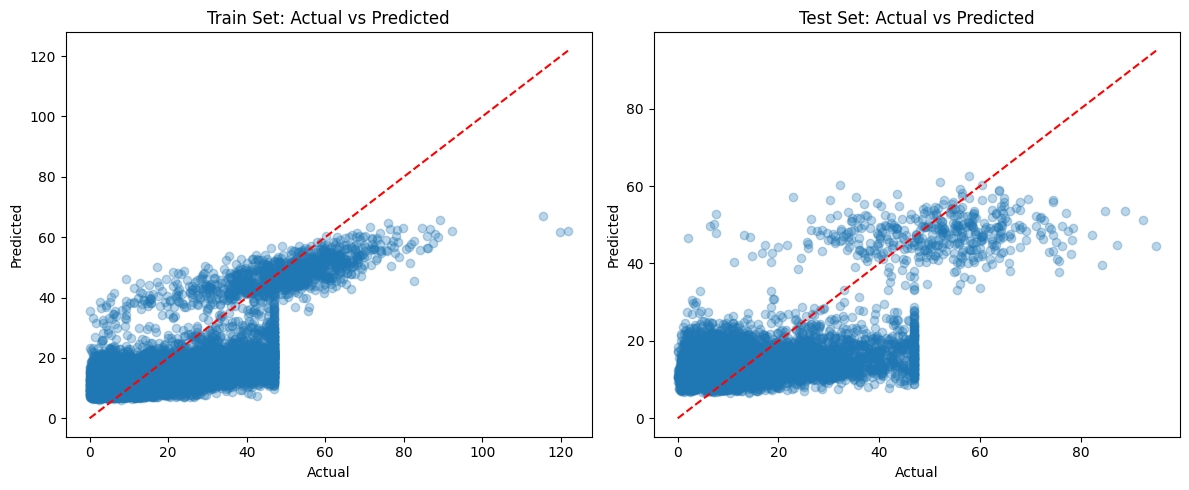

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on train and test
y_train_pred = best_model.predict(X_train_transformed)
y_test_pred = best_model.predict(X_test_transformed)

# Calculate metrics
def print_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} MAE: {mae:.4f}")
    print(f"{dataset_name} RMSE: {rmse:.4f}")
    print(f"{dataset_name} R²: {r2:.4f}")

print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_test, y_test_pred, "Test")

# Plot Predicted vs Actual
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Train Set: Actual vs Predicted")

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()


The model performs well on both training and test data, with almost similar error rates (MAE ~7.7 train vs 8.6 test) and decent R² scores (0.56 train, 0.44 test). This indicates it generalizes reasonably without significant overfitting. The slight increase in test error is expected and acceptable given the complexity of our problem. 

There is still some room for improvement with feature engineering and brainstorming more features to improve model performance.

In [37]:
y_test_pred = best_model.predict(X_test_transformed)

results_df = pd.DataFrame({
    'Predicted_total_kwh': y_test_pred,
    'Actual_total_kwh': y_test
})

results_df['Predicted_total_kwh'] = results_df['Predicted_total_kwh'].round(3)
print(results_df.head(10))


/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/ml-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


       Predicted_total_kwh  Actual_total_kwh
14432               16.288          16.41306
7102                15.565          38.92164
3692                18.022          15.75462
12854               15.297          35.53982
11973               12.201           3.71284
11972               15.282          32.81188
11971               19.067          30.96587
15210               15.228          29.20122
17941               11.111          17.91904
17942               10.550           8.23299
